In [25]:
import math, sys, functools, os, codecs
from glob import glob
import sqlite3
import numpy as np
import numpy.random as rd
from numpy import matrix
import pandas as pd
import scipy as sp
from scipy import stats as st
from datetime import  datetime as dt
from collections import Counter
from itertools import chain
import multiprocessing as mp

import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation as ani
import seaborn as sns
sns.set(style="darkgrid", palette="muted", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["patch.force_edgecolor"] = True

# OS判別 ======================
flag_win32 = False
try:
    os.uname()
except AttributeError:
    flag_win32 = True

# Mac用フォント設定
if not flag_win32:
    font_path = '/Library/Fonts/Osaka.ttf'
    font_prop = font_manager.FontProperties(fname=font_path)
    matplotlib.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.family'] = 'Osaka'

import IPython.display as ipyd

def overwrite_print(msg):
    assert type(msg) == str
    sys.stdout.write("\r" + msg)
    sys.stdout.flush()

import  pickle
def unpickle(filename):
    with open(filename, 'rb') as fo:
        p = pickle.load(fo)
    return p

def to_pickle(filename, obj):
    with open(filename, 'wb') as f:
        pickle.dump(obj, f, -1)


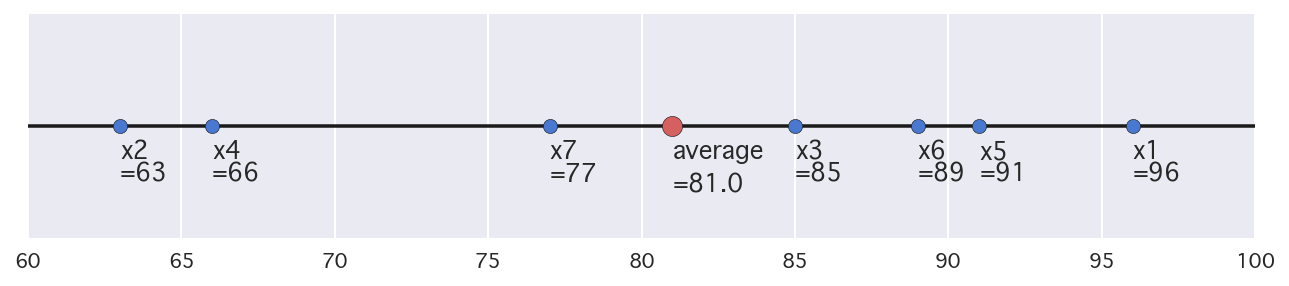

In [26]:
x = [96, 63, 85, 66, 91, 89, 77]
m = np.mean(x)
plt.figure(figsize=(11,2))
plt.yticks([])
plt.xlim(60,100)
plt.ylim(-1,1)
plt.scatter(x, np.zeros_like(x), s=50,zorder=100)
plt.scatter(np.mean(x), [0], s=100, c="r",zorder=100)

for i in range(len(x)):
    plt.text(x[i],-0.3,"x{}".format(i+1),size=12)
    plt.text(x[i],-0.5,"={}".format(x[i]),size=12)

plt.text(m,-0.3,"average",size=12)
plt.text(m,-0.6,"={}".format(m),size=12)
plt.plot([0,100],[0,0],c="k",zorder=10)
plt.show()

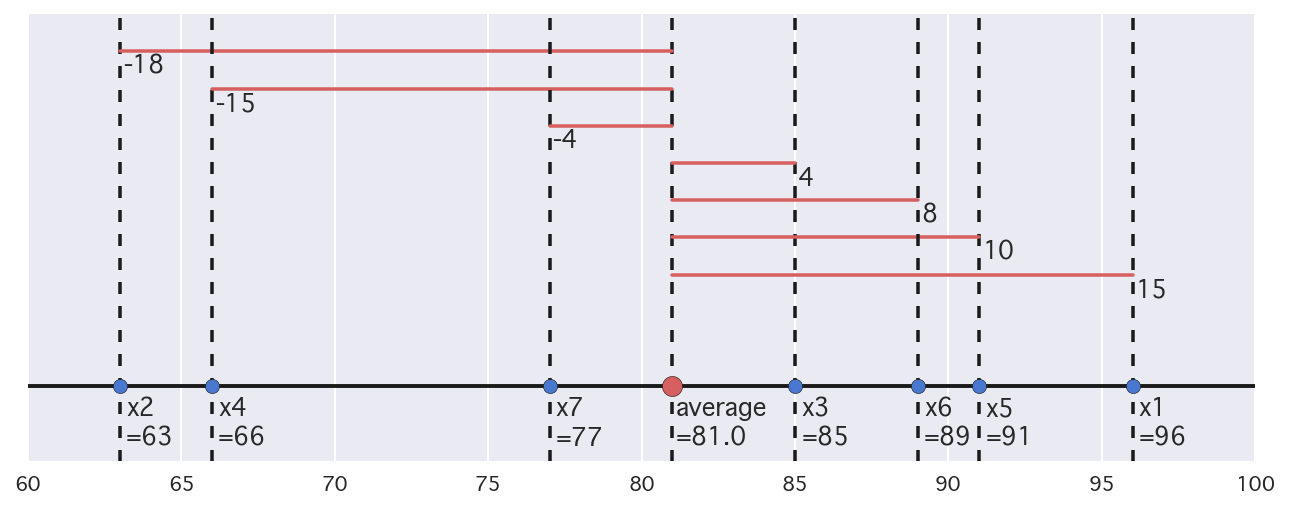

In [27]:
x = [96, 63, 85, 66, 91, 89, 77]
m = np.mean(x)
plt.figure(figsize=(11,4))
plt.yticks([])
plt.xlim(60,100)
plt.ylim(-1,5)
plt.scatter(x, np.zeros_like(x), s=50,zorder=100)
plt.scatter(np.mean(x), [0], s=100, c="r",zorder=100)

for i in range(len(x)):
    plt.text(x[i]+.2,-0.4,"x{}".format(i+1),size=12)
    plt.text(x[i]+.2,-0.8,"={}".format(x[i]),size=12)

plt.text(m+.1,-0.4,"average",size=12)
plt.text(m+.1,-0.8,"={}".format(m),size=12)
plt.plot([0,100],[0,0],c="k",zorder=10)
plt.plot([0,100],[0,0],"k",zorder=10)

plt.plot([m,m],[-5,10],"k--",zorder=10)
for i, p, sd in zip(range(len(x)),[1.5, 4.5, 3, 4 ,2 ,2.5 ,3.5],[ 15, -18, 4, -15, 10, 8, -4]):
    plt.plot([x[i],x[i]],[-5,10],"k--",zorder=10)
    plt.plot([x[i],m],[p,p],"r",zorder=10)
    plt.text(x[i]+.1,p-.3,"{}".format(sd),size=12)
plt.show()

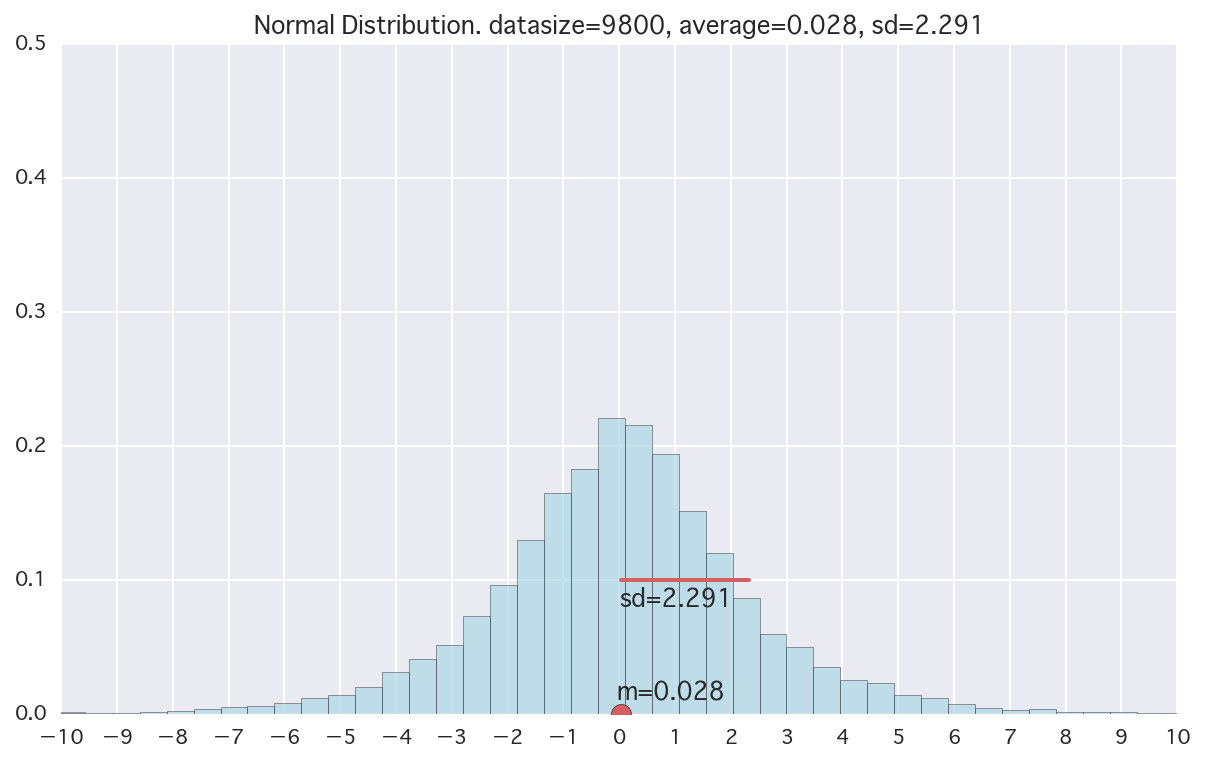

In [31]:
N = 0
num_frame = 26
unit = N/num_frame
data = []

def animate(nframe):
    global num_frame, N
    plt.clf()
    #n = (nframe+1) * unit
    v = 1 + 0.1 * nframe
    data.extend(np.random.normal(0, v, 350))
    N += 350 
    m    = np.mean(data)
    sd   = np.sqrt(np.var(data))
    plt.title("Normal Distribution. datasize={2:4d}, average={0:.3f}, sd={1:.3f}".format(m, sd,N))
    plt.xlim(-10,10)
    plt.ylim(0,.5)
    plt.hist(data, bins=50, color="lightblue", normed=True, alpha=0.7)
    plt.scatter(m, [0], s=100, c="r",zorder=100)
    plt.plot([m, m+sd],[.1,.1], c="r", lw=2)
    plt.text(0, .08,"sd={0:.3f}".format(sd),size=12)
    plt.text(-.05, 0.01,"m={0:.3f}".format(m),size=12)
    plt.xticks(np.arange(-10,11,1))

fig = plt.figure(figsize=(10,6))
anim = ani.FuncAnimation(fig, animate, frames=num_frame)
anim.save('../imgs/01-01_norm_hist_anim.gif', writer='imagemagick', fps=3, dpi=64)

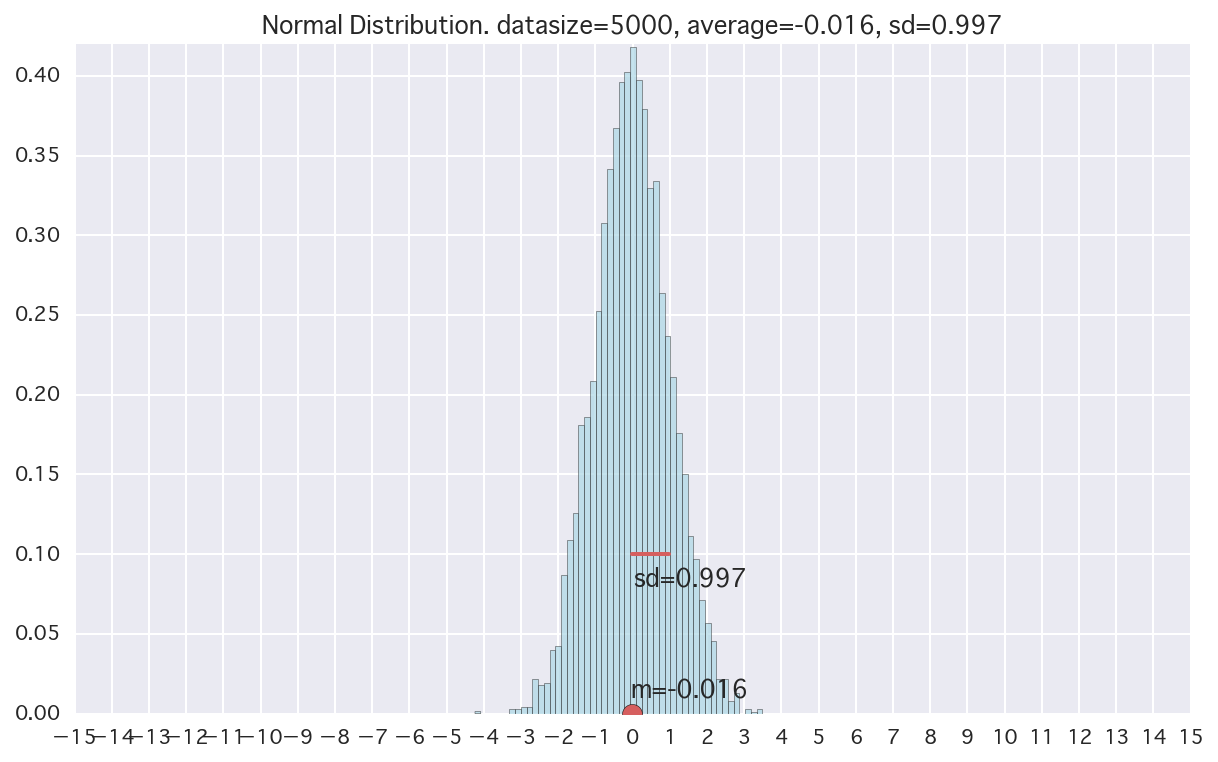

In [33]:

num_frame = 26
unit = N/num_frame
data = []

def animate(nframe):
    global num_frame
    plt.clf()
    #n = (nframe+1) * unit
    v = 1 + 0.2 * nframe
    
    n_data = 5000
    data = np.random.normal(0, v, n_data)
    m    = np.mean(data)
    sd   = np.sqrt(np.var(data))
    
    plt.title("Normal Distribution. datasize={2:4d}, average={0:.3f}, sd={1:.3f}".format(m, sd, n_data))
    plt.xlim(-15,15)
    plt.ylim(0,.42)
    plt.hist(data, bins=50, color="lightblue", normed=True, alpha=0.7)
    plt.scatter(m, [0], s=100, c="r",zorder=100)
    plt.plot([m, m+sd],[.1,.1], c="r", lw=2)
    plt.text(0, .08,"sd={0:.3f}".format(sd),size=12)
    plt.text(-.05, 0.01,"m={0:.3f}".format(m),size=12)
    plt.xticks(np.arange(-15,16,1))

fig = plt.figure(figsize=(10,6))
anim = ani.FuncAnimation(fig, animate, frames=num_frame)
anim.save('../imgs/01-01_norm_hist_anim.gif', writer='imagemagick', fps=3, dpi=128)